In [ ]:
"""Online shopping intension analysis.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/17knLSeiLxXg26M2k1LWCKm3p3VP4g7XB

Problem Statement:
People often spend a lot of time browsing through online shopping websites, but the coversion rate into purchases is low. Determine the likelihood of purchase based on the given features in the datsaset. The dataset consists of feature vectors belonging to 12,330 online sessions. The purpose of this project is to identify user behaviour patterns to effectively understand features that influence the sales.


Data Description:

The dataset cointains the following features:

The data set provided had features which are more or less related to the purchases of the users. All features are mentioned below with explanations.

The data set provided for model making has a total entry of "12330" with "18" features. Among these features 9 features are numerical, continuous and distinct, and 9 are categorical including the target feature Revenue.

The categorical features are Special Day, Month, Operating Systems, Browser, Region, Traffic Type, Visitor Type, Weekend. The numerical features are Administrative, Administrative Duration, Informational, Information Duration, Product Related, Product Relation duration, Bounce rates, Exit rates, Page Values.

Administrative: Number of pages visited by the user for user account management related activities.

Administrative Duration: Time spent on Admin pages by the user.

Informational: Number of pages visited by the user about the website

_Informational Duration: Time spent on Informational pages by the user

_Product Related: Number of product related pages visited by the user

Product Related Duration: Time spent on Product related pages by the user.

Bounce Rates: Average bounce rate of the pages visited by the user. It represents the percentage of visitors who enter the site and then leave rather than continuing to view other pages within the same site.

Exit Rates: Average exit rate of the pages visited by the user. It is the percentage of people who left your site from that page.

Page Values: Average page value of the pages visited by the user. It is the average value for a page that a user visited before landing on the goal page or completing an Ecommerce transaction (or both).

Special Day: Closeness of the visiting day to a special event like Mother‟s Day or festivals like Christmas.

Month: Visiting month during the whole year.

Operating Systems: Operating Systems of the visitor.

Browser: Browser of the visitor.

Region: Geographic region from which the session has been started by the visitor.

Traffic Type: Traffic source through which user has entered the website.

Visitor Type: Defines the nature of user.

Weekend:whether weekend or not
"""

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount("Mydrive")

In [5]:
df=pd.read_csv('D:\datasets\online_shoppers_intention.csv')
df.head(5)
#press tab to get list of functions in the pandas lib

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


all cols are relevant

In [7]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [8]:
df.Weekend.describe()#displays min,max,avg,mode,count value
#.describe() fun is applied on num col,cate col and df.
#osof a user is 1.os of a user is 8.it is not that user is using 8 os.user is using os of type 8
#os is cate var.a user is not using 13browsers.usser is using browser of type 13.
# a user is not from 9 regions he is from region type 9.
#Browser,OperatingSystems,Region,TrafficType col must be changed to object.
#

count     12330
unique        2
top       False
freq       9462
Name: Weekend, dtype: object

In [9]:
df['Browser']=df['Browser'].astype(object)
df['OperatingSystems']=df['OperatingSystems'].astype(object)
df['Region']=df['Region'].astype(object)
df['TrafficType']=df['TrafficType'].astype(object)
#these are cate vars with int values which are classes of cate var.
#cate var mhdtypeof obj.

In [11]:
df.dtypes
#last 2 cols have bool dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems            object
Browser                     object
Region                      object
TrafficType                 object
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [10]:
df.SpecialDay.value_counts()#
#.value_counts() displays the count of each and every value in a cate and num var.

0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

0.6,0.2,0.4 are aspeacial day classes?

step3:null value treatment then replace values in columns

In [12]:
df.isnull().sum().head(3)#no null values in dataset

Administrative             0
Administrative_Duration    0
Informational              0
dtype: int64

replace value in columns SpecialDay,Weekend,Revenue.
We should never touch the target variable Revenue.sir told.no astype,no null val treatment

In [13]:
df.SpecialDay = df.SpecialDay.replace(to_replace = [0.2,0.4,0.6 ,0.8], value = 1)
#
#weekend 1 and 0#1 it is weekend
#revenue 0 and 1#1 user will buy a product

i cannot replacce 0 as childrend say and 1 as mothers day.
spday can have 2 classes 0 and  1.spdaytype1 and type 1

spday,weekend,revenue are cate vars with values 0,1,0,1,0,1
i will use replace function.

In [14]:
df.SpecialDay.value_counts()
#sp day of type 0 is more

0.0    11079
1.0     1251
Name: SpecialDay, dtype: int64

In [15]:
df.Weekend.value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

In [16]:
df.Weekend.replace(to_replace={False:0,True:1},inplace=True)
#do not put "False"

In [17]:
df.Weekend.value_counts()

0    9462
1    2868
Name: Weekend, dtype: int64

In [18]:
df.Revenue.replace(to_replace={False:0,True:1},inplace=True)

In [19]:
df.head(4),df.dtypes

(   Administrative  Administrative_Duration  Informational  \
 0               0                      0.0              0   
 1               0                      0.0              0   
 2               0                      0.0              0   
 3               0                      0.0              0   
 
    Informational_Duration  ProductRelated  ProductRelated_Duration  \
 0                     0.0               1                 0.000000   
 1                     0.0               2                64.000000   
 2                     0.0               1                 0.000000   
 3                     0.0               2                 2.666667   
 
    BounceRates  ExitRates  PageValues  SpecialDay Month OperatingSystems  \
 0         0.20       0.20         0.0         0.0   Feb                1   
 1         0.00       0.10         0.0         0.0   Feb                2   
 2         0.20       0.20         0.0         0.0   Feb                4   
 3         0.05       0

In [20]:
df.SpecialDay.value_counts(),df.Weekend.value_counts()
#astype()

(0.0    11079
 1.0     1251
 Name: SpecialDay, dtype: int64,
 0    9462
 1    2868
 Name: Weekend, dtype: int64)

In [21]:
df['SpecialDay']=df['SpecialDay'].astype(object)
df['Weekend']=df['Weekend'].astype(object)

In [ ]:
df1=df.copy()
#good raw data set stored in df1

In [22]:
x=df.iloc[:,0:-1]#all rows of col at index0 to 1 st col from last-1#particular cols rep in []

In [23]:
x.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0
2,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0


In [24]:
df_num=df.select_dtypes(include=['int64','float64'])
df_num=df_num.iloc[:,0:-1]
df_num.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0


In [25]:
type(df_num),df_num.columns

(pandas.core.frame.DataFrame,
 Index(['Administrative', 'Administrative_Duration', 'Informational',
        'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
        'BounceRates', 'ExitRates', 'PageValues'],
       dtype='object'))

In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()#StandardScaler function is stored in var sc.#instance
a=sc.fit_transform(df_num)#sc instance has a fun named fit_transform which scales numerical df
#type(a)
df_num_sc=pd.DataFrame(a,columns=df_num.columns)

In [27]:
#columns para provides column names/labels for the scaled array.
df_num_sc.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178


In [28]:
df_cat=df.select_dtypes(include=[object])
df_cat.head()

,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,Feb,1,1,1,1,Returning_Visitor,0
1,0.0,Feb,2,2,1,2,Returning_Visitor,0
2,0.0,Feb,4,1,9,3,Returning_Visitor,0
3,0.0,Feb,3,2,2,4,Returning_Visitor,0
4,0.0,Feb,3,3,1,4,Returning_Visitor,1


In [29]:
(df_cat.SpecialDay.value_counts())

0.0    11079
1.0     1251
Name: SpecialDay, dtype: int64

In [30]:
df_cat1=df_cat.iloc[:,[1,2,3,4,5,6]]
df_cat1.head(2)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType
0,Feb,1,1,1,1,Returning_Visitor
1,Feb,2,2,1,2,Returning_Visitor


In [ ]:
df.columns

<AxesSubplot:xlabel='ProductRelated', ylabel='Density'>

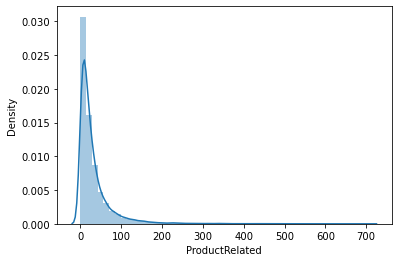

In [31]:
sns.distplot(a=df["ProductRelated"])

In [ ]:
"""=>From the above graph we can understand teh product related is showing high in between 0-100"""

<AxesSubplot:xlabel='ProductRelated_Duration', ylabel='Density'>

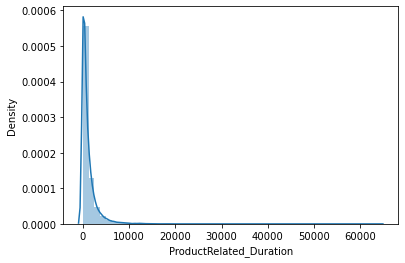

In [32]:
sns.distplot(a=df["ProductRelated_Duration"])

In [ ]:
"""=>From these graph we can see the high range in between 0-10000 below only"""

<AxesSubplot:xlabel='BounceRates', ylabel='Density'>

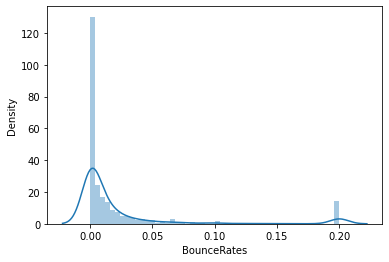

In [33]:
sns.distplot(a=df["BounceRates"])

In [ ]:
"""=>From the above graph we can see the range high at starting below 0.05 only"""

<AxesSubplot:xlabel='ExitRates', ylabel='Density'>

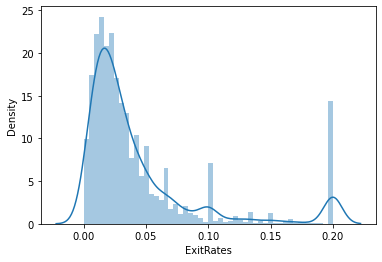

In [34]:
sns.distplot(a=df["ExitRates"])

In [ ]:
"""=>we can see the exitrates also have range in below 0.05"""

<AxesSubplot:xlabel='Region', ylabel='count'>

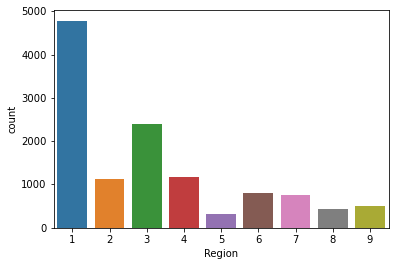

In [35]:
sns.countplot(data=df,x="Region")

In [ ]:
"""=>From the above graph we saw 9 region out of the 9 1st has high and 5 is low"""

<AxesSubplot:xlabel='TrafficType', ylabel='count'>

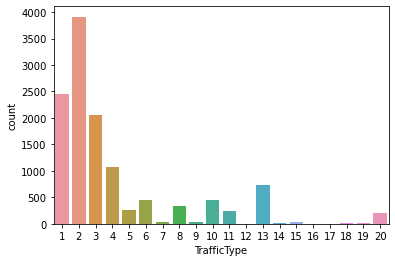

In [36]:
sns.countplot(data=df,x ='TrafficType')

In [ ]:
"""=>we have multiple no.of the traffic types out of these 2 is high compare to others"""

<AxesSubplot:xlabel='VisitorType', ylabel='count'>

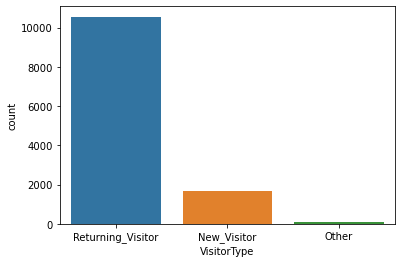

In [37]:
sns.countplot(data=df,x="VisitorType")

In [ ]:
"""=>we have 3 types of the visitors most of them are returning_visitor and other  are also compare both"""

<AxesSubplot:xlabel='Revenue', ylabel='count'>

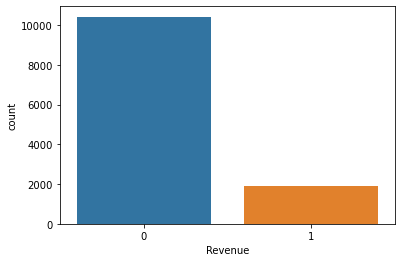

In [38]:
sns.countplot(data=df,x="Revenue")

In [ ]:
"""=>From the above graph we have revenue of o is very high compare to remaining"""

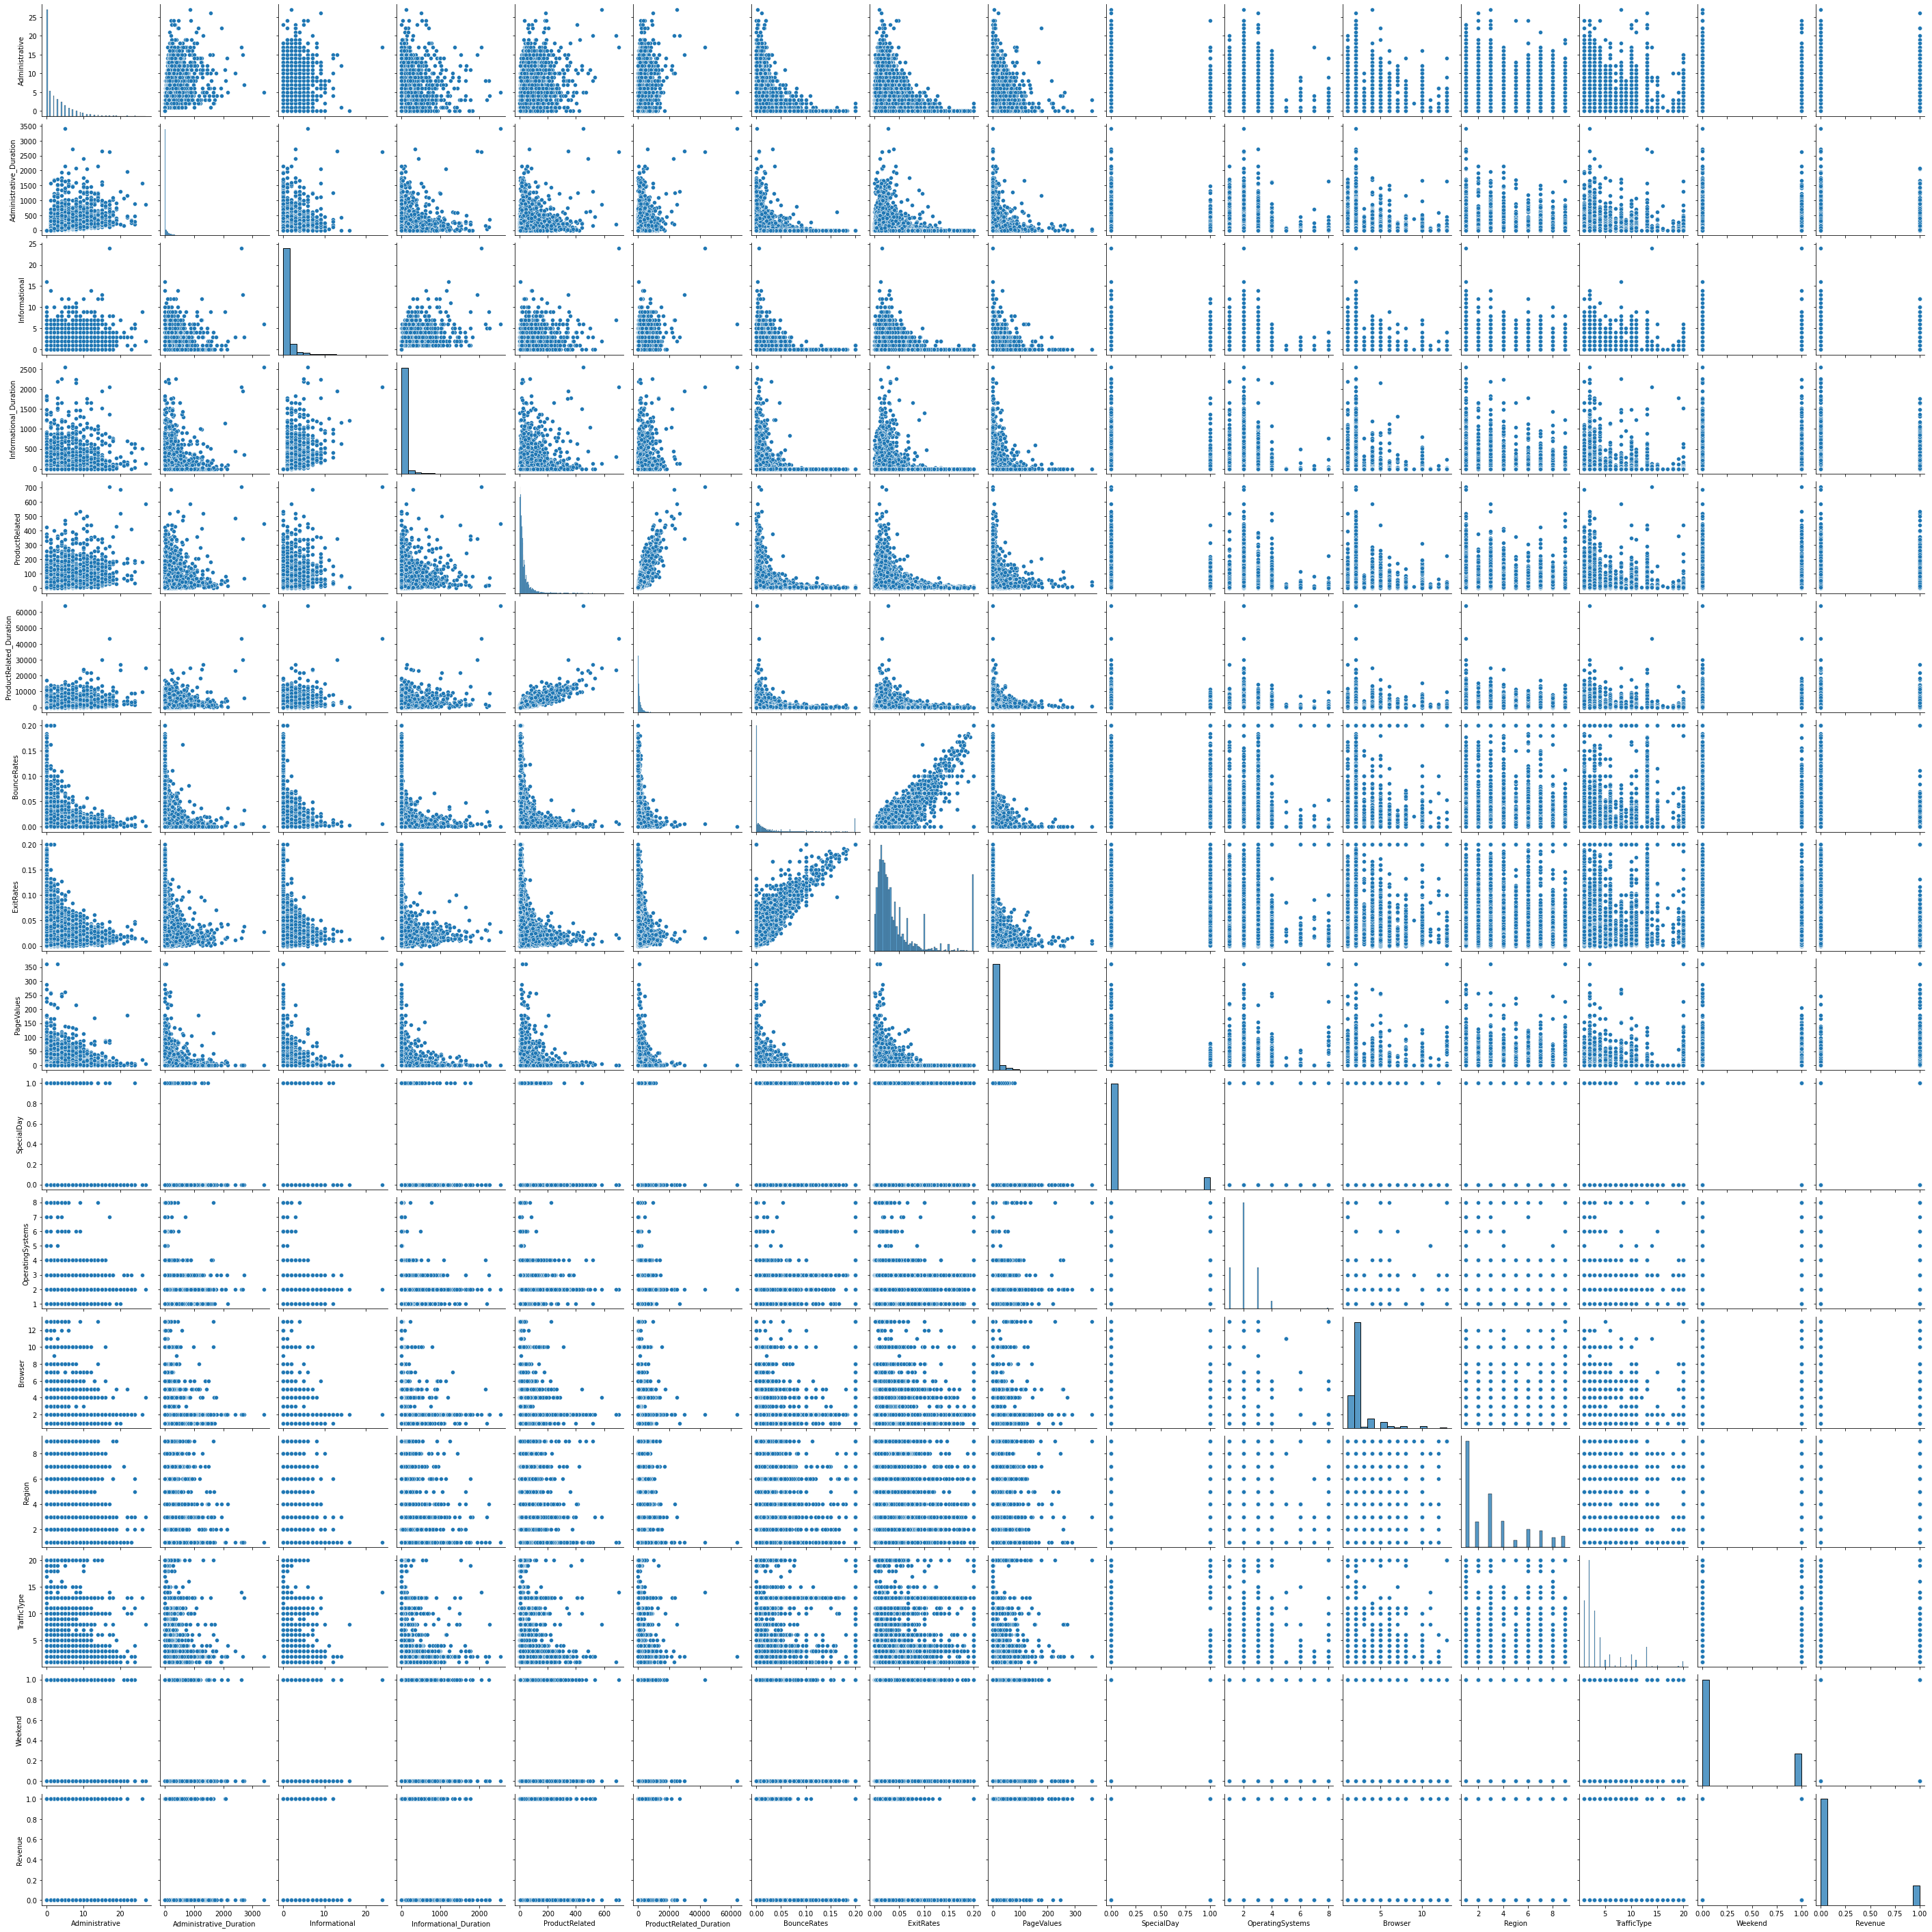

In [39]:
sns.pairplot(df)

In [ ]:
"""=>From the above pairplot we can observe the corelation between all the attributes"""

<AxesSubplot:>

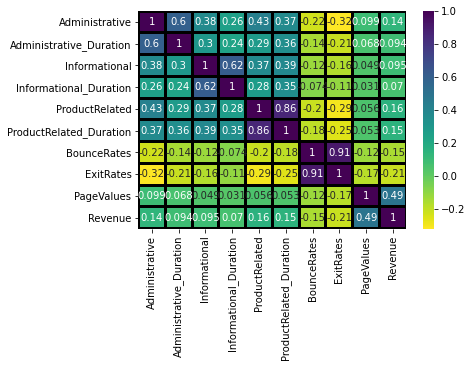

In [40]:
sns.heatmap(df.corr(),annot=True,cmap="viridis_r",linewidth=2,linecolor="black")

df_cat.columns
#i want to see the classes of categorical cols
#for i in range(0,len(df_cat.columns)):
# for i in df_cat.columns:
#     s=df_cat[i].value_counts()
#     print(s.name=i)
#

In [ ]:
df_cat.columns[1]

In [41]:
dum2=df_cat.iloc[:,[0,-1]]

In [42]:
dum1=pd.get_dummies(data=df_cat1)
dummy=pd.concat([dum2,dum1],axis=1)
dummy.head(3)

,SpecialDay,Weekend,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,...,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
df_pre=pd.concat([df_num_sc,dummy],axis=1)
df_pre.head(4)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,0.0,...,0,0,0,0,0,0,0,0,0,1
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,0.0,...,0,0,0,0,0,0,0,0,0,1
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,0.0,...,0,0,0,0,0,0,0,0,0,1
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,0.0,...,0,0,0,0,0,0,0,0,0,1


In [44]:
x=df_pre

In [45]:
df.Revenue.value_counts()
#high imbalance in classes of t.v

0    10422
1     1908
Name: Revenue, dtype: int64

In [46]:
y=df.Revenue

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8631, 74), (3699, 74), (8631,), (3699,))

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf = RandomForestClassifier(max_depth=2,random_state=2)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=2)

fit function is used to train the model with xtra and y tran.model is trained now.

In [50]:
# predict on the test dataset i.e xtest
y_pred = rf.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
acc=accuracy_score(y_test, y_pred)
acc

0.8445525817788592

<AxesSubplot:>

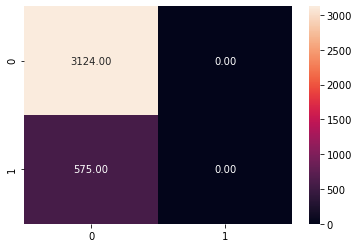

In [53]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".2f")

In [54]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
report

'              precision    recall  f1-score   support\n\n           0       0.84      1.00      0.92      3124\n           1       0.00      0.00      0.00       575\n\n    accuracy                           0.84      3699\n   macro avg       0.42      0.50      0.46      3699\nweighted avg       0.71      0.84      0.77      3699\n'

70 random records are split into xtr and ytr.dtree 1.it makes an op.
70 random records are split into xtr and ytr.dtree 2.it makes an op.
#70 random records are split into xtr and ytr.dtree 3.it makes an op.
avg of op of all trees are taken.

A Random Forest Algorithm
Classification and Regression problems in Machine Learning.

In [55]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [56]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
acc

0.8942957556096243

<AxesSubplot:>

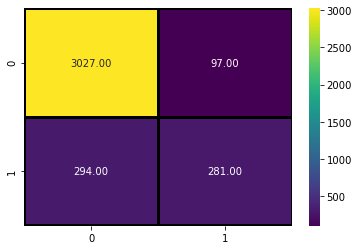

In [57]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".2f",cmap="viridis",linewidth=2,linecolor="black")

In [58]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
report

'              precision    recall  f1-score   support\n\n           0       0.91      0.97      0.94      3124\n           1       0.74      0.49      0.59       575\n\n    accuracy                           0.89      3699\n   macro avg       0.83      0.73      0.76      3699\nweighted avg       0.89      0.89      0.88      3699\n'

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [60]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
acc

0.8734793187347932

<AxesSubplot:>

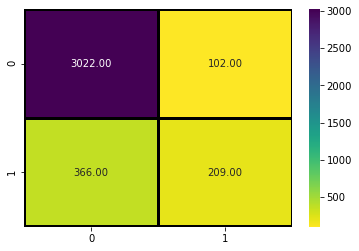

In [61]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".2f",cmap="viridis_r",linewidth=2,linecolor="black")

In [62]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
report

'              precision    recall  f1-score   support\n\n           0       0.89      0.97      0.93      3124\n           1       0.67      0.36      0.47       575\n\n    accuracy                           0.87      3699\n   macro avg       0.78      0.67      0.70      3699\nweighted avg       0.86      0.87      0.86      3699\n'

In [63]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred=dtree.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [64]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
acc

0.8564476885644768

<AxesSubplot:>

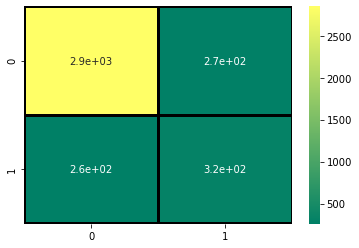

In [65]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap="summer",linewidth=2,linecolor="black")

In [68]:
# "from sklearn.metrics import classification_report
# report=classification_report(y_test,y_pred)
# report

In [ ]:
"""Model:svc

accuracy:89

precision:91

recall:97

f1-score:94

Model: kNeareast neighbors

accuracy:87

precision:89

recall:97

f1-score:93

Model: Decision Tree

accuracy:85

precision:92

recall:92

f1-score:92

Model: RandomForest

accuracy:84

precision:84

recall:100

f1-score:92

compare to to all model svc gives best accuracy
"""